## Tutorial

Welcome to `ktplotspy`! This is a python library to help visualise `CellphoneDB` results, ported from the original [ktplots R package](https://www.github.com/zktuong/ktplots) (which still has several other visualisation options). Here, we will go through a quick tutorial on how to use the functions in this package.

**Import libraries**

In [1]:
import os
import anndata as ad
import pandas as pd
import ktplotspy as kpy
import matplotlib.pyplot as plt

**Prepare input**

We will need 3 files to use this package, the h5ad file used for `CelllphoneDB` and the `means.txt` and `pvalues.txt` output. `deconvoluted.txt` is only used for `plot_cpdb_chord`.

In [2]:
os.chdir(os.path.expanduser("~/Documents/Github/ktplotspy"))

# read in the files
# 1) .h5ad file used for performing cellphonedb
adata = ad.read_h5ad("data/kidneyimmune.h5ad")

# 2) output from cellphonedb
means = pd.read_csv("data/out/means.txt", sep="\t")
pvals = pd.read_csv("data/out/pvalues.txt", sep="\t")
decon = pd.read_csv("data/out/deconvoluted.txt", sep="\t")

### Heatmap

The original heatmap plot from `CellphoneDB` can be achieved with this reimplemented function.

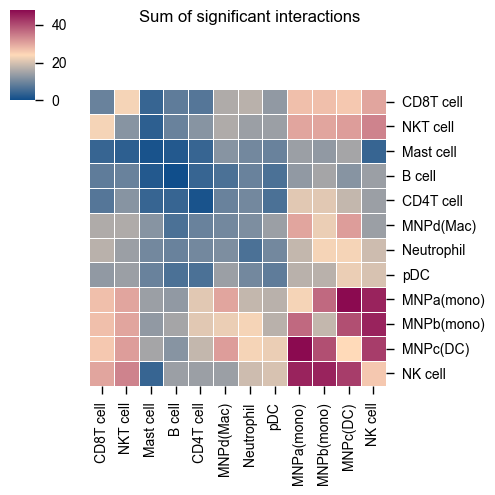

In [3]:
kpy.plot_cpdb_heatmap(adata=adata, pvals=pvals, celltype_key="celltype", figsize=(5, 5), title="Sum of significant interactions")

The current heatmap is directional (check `count_network` and `interaction_edges` for more details in `return_tables = True`).

To obtain the heatmap where the interaction counts are not symmetrical, do:

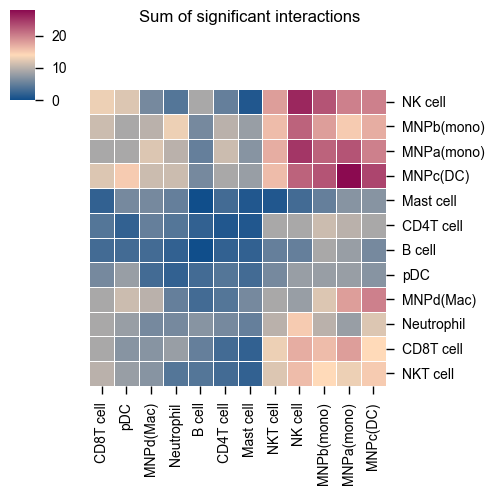

In [4]:
kpy.plot_cpdb_heatmap(
    adata=adata,
    pvals=pvals,
    celltype_key="celltype",
    figsize=(5, 5),
    title="Sum of significant interactions",
    symmetrical=False,
)

The values for the `symmetrical=False` mode follow the direction of the L-R direction where it's always moleculeA:celltypeA -> moleculeB:celltypeB.

Therefore, if you trace on the `x-axis` for `celltype A` [MNPa(mono)] to `celltype B` [CD8T cell] on the `y-axis`:

A -> B is 18 interactions

Whereas if you trace on the `y-axis` for `celltype A` [MNPa(mono)] to `celltype B` [CD8T cell] on the `x-axis`:

A -> B is 9 interactions

`symmetrical=True` mode will return 18+9 = 27

### Dot plot

A simple usage of `plot_cpdb` is like as follows:

/Users/uqztuong/Documents/GitHub/ktplotspy/ktplotspy/plot/plot_cpdb.py:233: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


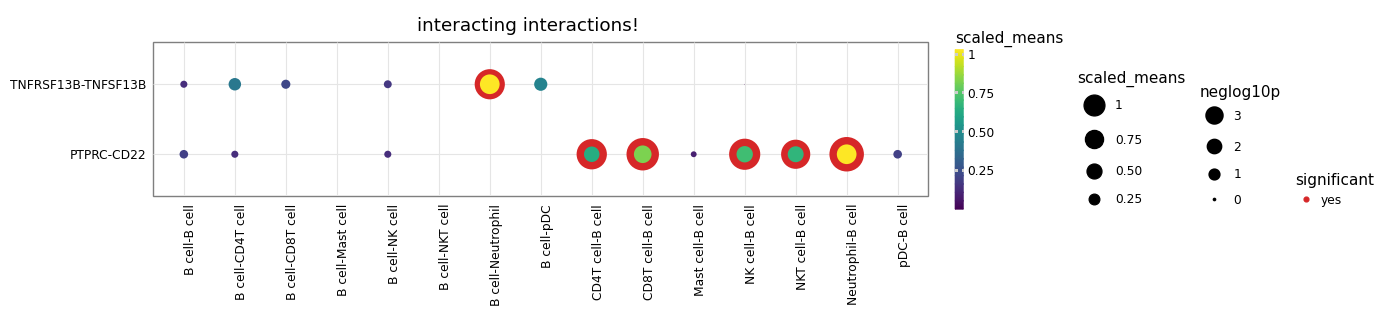

<ggplot: (683911918)>

In [5]:
# TODO: How to specify the default plot resolution??
kpy.plot_cpdb(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",  # this means all cell-types
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    genes=["PTPRC", "TNFSF13"],
    figsize=(10, 2),
    title="interacting interactions!",
)

You can also specify a `gene_family`.

/Users/uqztuong/Documents/GitHub/ktplotspy/ktplotspy/plot/plot_cpdb.py:233: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


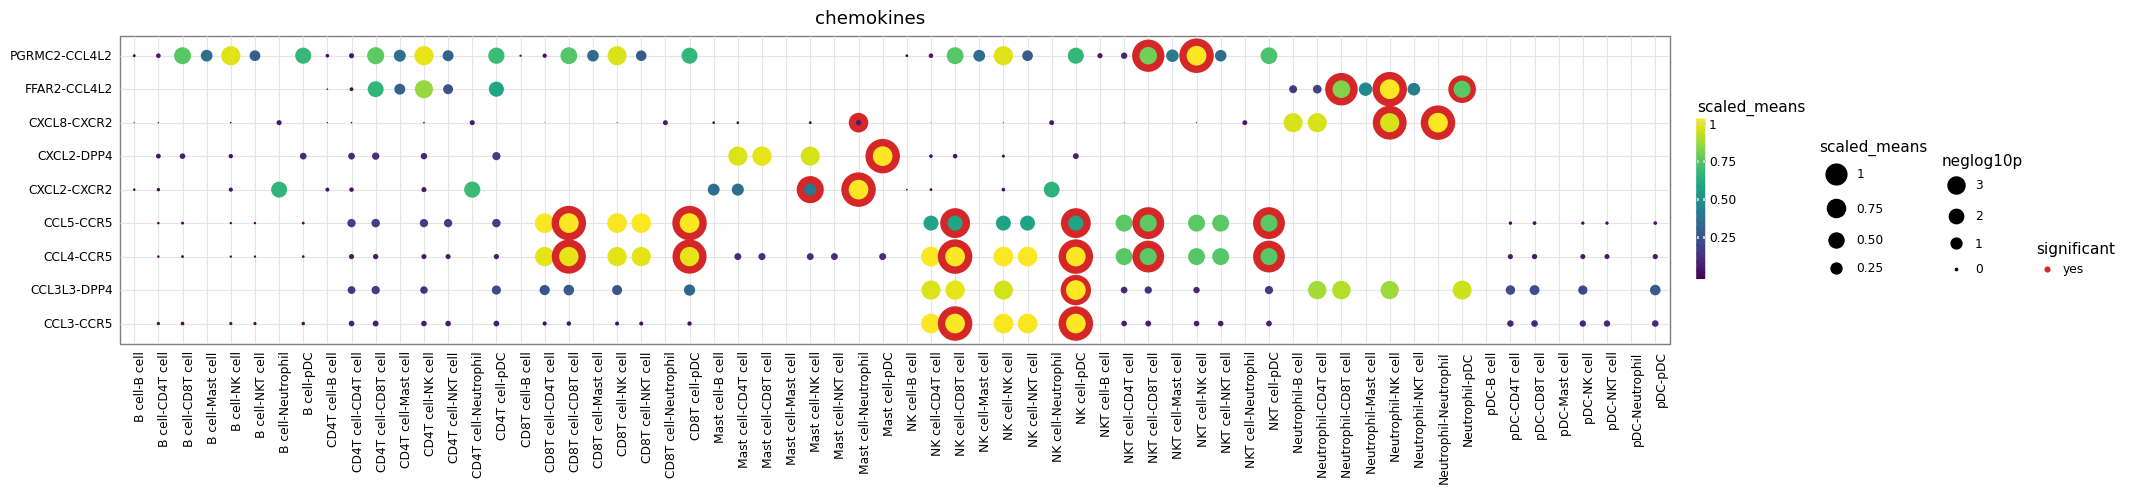

<ggplot: (685205414)>

In [6]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1=".",
    cell_type2=".",
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    gene_family="chemokines",
    figsize=(20, 4),
)

Or don't specify either and it will try to plot all significant interactions.

/Users/uqztuong/Documents/GitHub/ktplotspy/ktplotspy/plot/plot_cpdb.py:233: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


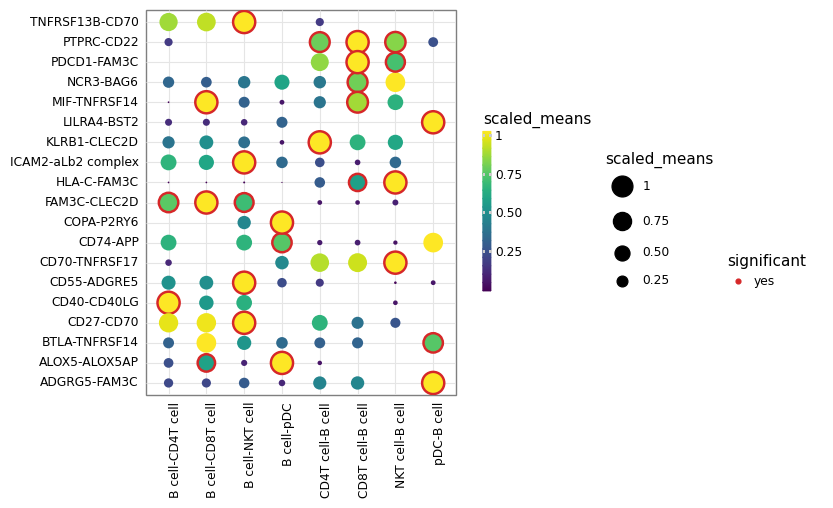

<ggplot: (685412084)>

In [7]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="B cell",
    cell_type2="pDC|T",
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    highlight_size=1,
    figsize=(4, 5),
)

If you prefer, you can also use the `squidpy` inspired plotting style:

/Users/uqztuong/Documents/GitHub/ktplotspy/ktplotspy/plot/plot_cpdb.py:233: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


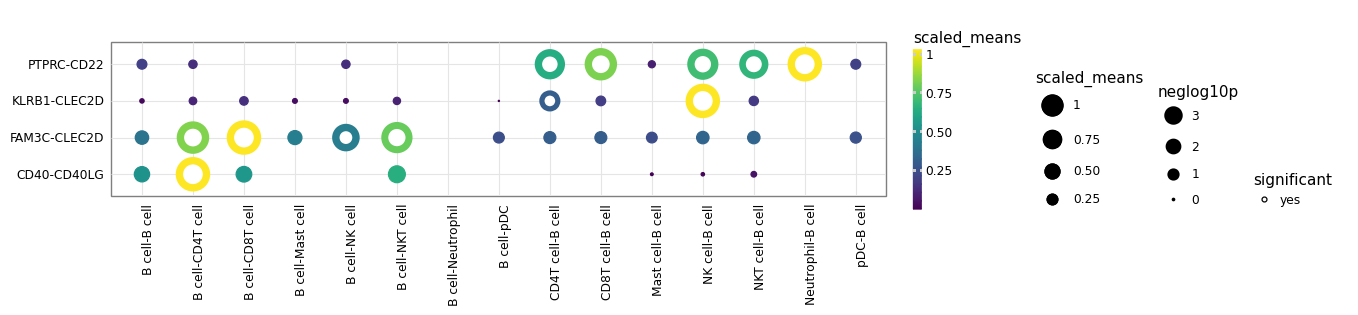

<ggplot: (685488984)>

In [8]:
kpy.plot_cpdb(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    celltype_key="celltype",
    genes=["PTPRC", "CD40", "CLEC2D"],
    default_style=False,
    figsize=(10, 2),
)

### Chord diagram

There is a preliminary implementation of a chord diagram:

/Users/uqztuong/Documents/GitHub/ktplotspy/ktplotspy/plot/plot_cpdb.py:233: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


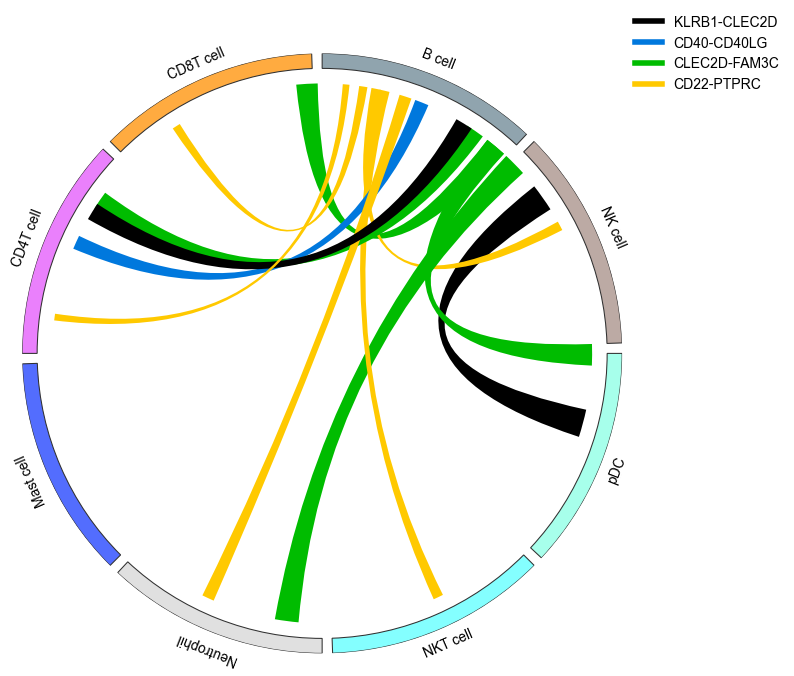

In [9]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    celltype_key="celltype",
    genes=["PTPRC", "CD40", "CLEC2D"],
    figsize=(6, 6),
)

Colour of edges can be changed with a dictionary (below), or with a `edge_cmap` option:

/Users/uqztuong/Documents/GitHub/ktplotspy/ktplotspy/plot/plot_cpdb.py:233: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


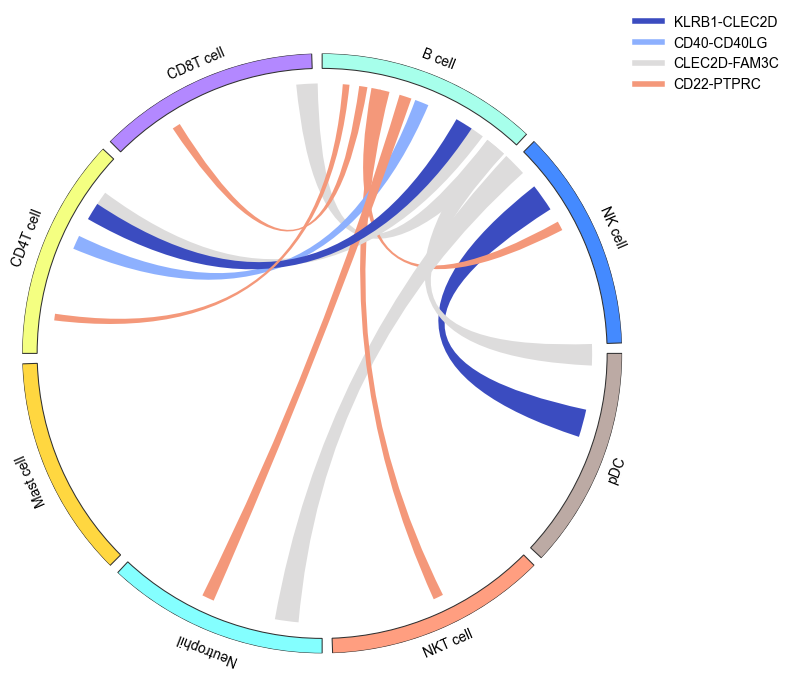

In [10]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    celltype_key="celltype",
    genes=["PTPRC", "CD40", "CLEC2D"],
    edge_cmap=plt.cm.coolwarm,
    figsize=(6, 6),
)

If your `adata` already has e.g. `adata.uns['celltype_colors']`, it will retrieve the `face_colours` correctly:

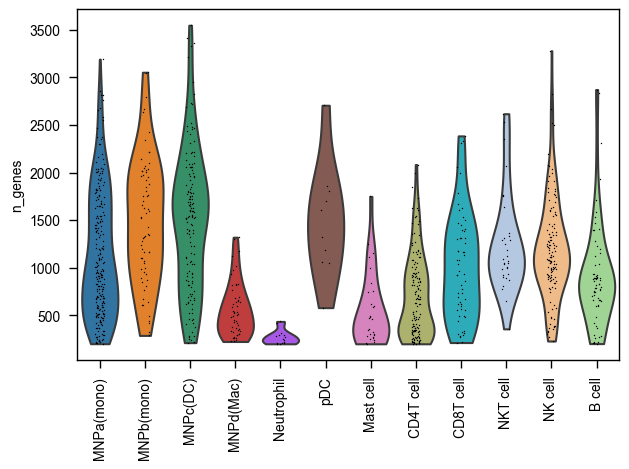

/Users/uqztuong/Documents/GitHub/ktplotspy/ktplotspy/plot/plot_cpdb.py:233: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


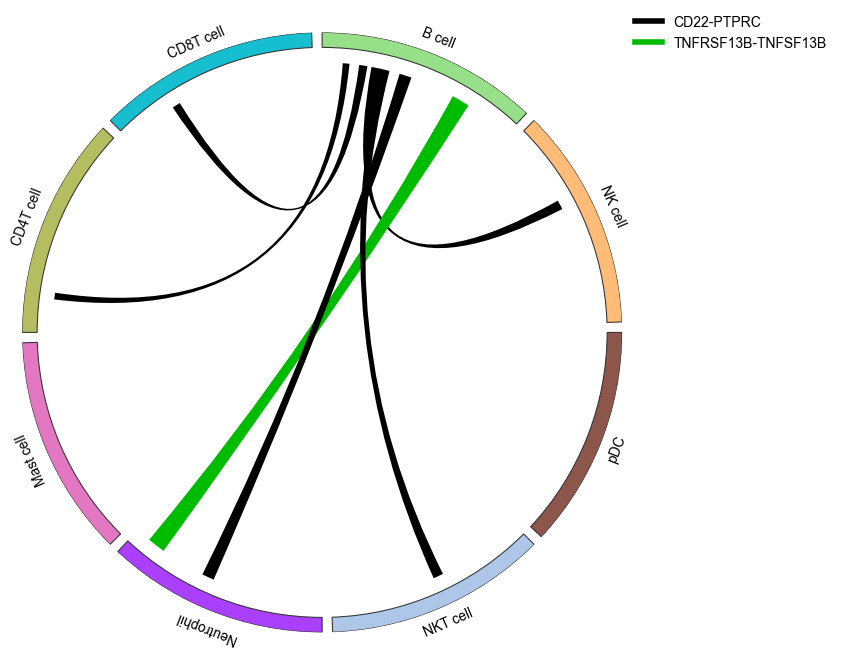

In [11]:
import scanpy as sc

sc.pl.violin(adata, ["n_genes"], groupby="celltype", rotation=90)
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    celltype_key="celltype",
    genes=["PTPRC", "TNFSF13", "BMPR2"],
    figsize=(6, 6),
)

You can also provide dictionaries to change the colours for both `faces` and `edges`.

/Users/uqztuong/Documents/GitHub/ktplotspy/ktplotspy/plot/plot_cpdb.py:233: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.


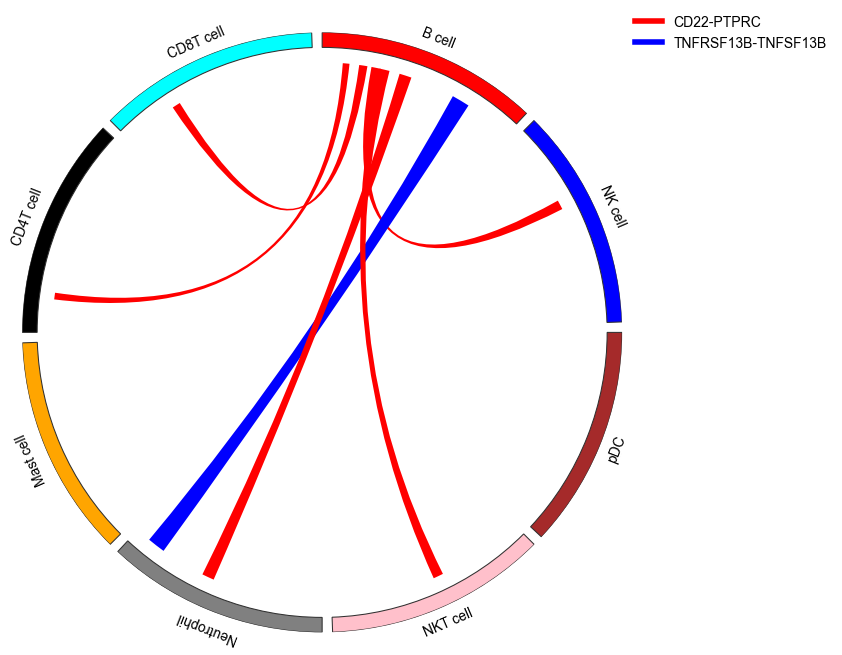

In [12]:
kpy.plot_cpdb_chord(
    adata=adata,
    cell_type1="B cell",
    cell_type2=".",
    means=means,
    pvals=pvals,
    deconvoluted=decon,
    celltype_key="celltype",
    genes=["PTPRC", "TNFSF13", "BMPR2"],
    face_col_dict={
        "B cell": "red",
        "NK cell": "blue",
        "CD4T cell": "black",
        "pDC": "brown",
        "Neutrophil": "grey",
        "Mast cell": "orange",
        "NKT cell": "pink",
        "CD8T cell": "cyan",
    },
    edge_col_dict={"CD22-PTPRC": "red", "TNFRSF13B-TNFSF13B": "blue"},
    figsize=(6, 6),
)

That's it for now! Please check out the original [ktplots R package](https://www.github.com/zktuong/ktplots) if you are after other kinds of visualisations.